# Case Study Breast Cancer
Let's prepare a step-by-step tutorial for the Decision Tree algorithm using the Breast Cancer dataset. We'll demonstrate how the choices of different splitting criteria (Information and Gini Index) and tree pruning (max depth) affect the classification results. We'll print the results of the classification and visualize the accuracy vs hyperparameters for comparison.

## Setup
Import necessary libraries and load the Breast Cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Split the dataset into training and testing sets.

In [2]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train Decision Tree models with different splitting criteria and max depth.

In [3]:
# Create a list of splitting criteria
splitting_criteria = ['entropy', 'gini']

# Create a list of max depth values
max_depth_values = range(1, 20, 2)

# Create an empty dictionary to store the results
results = {}

# Train Decision Tree models with different splitting criteria and max depth
for criterion in splitting_criteria:
    for max_depth in max_depth_values:
        dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[(criterion, max_depth)] = {
            'model': dt_model,
            'accuracy': accuracy
        }

## Print the results of the classification.

In [4]:
# Print the results of the classification
print("Results of Decision Tree Classification:")
for (criterion, max_depth), result in results.items():
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Accuracy: {result['accuracy']:.2f}")

Results of Decision Tree Classification:
Criterion: entropy, Max Depth: 1, Accuracy: 0.89
Criterion: entropy, Max Depth: 3, Accuracy: 0.96
Criterion: entropy, Max Depth: 5, Accuracy: 0.94
Criterion: entropy, Max Depth: 7, Accuracy: 0.94
Criterion: entropy, Max Depth: 9, Accuracy: 0.95
Criterion: entropy, Max Depth: 11, Accuracy: 0.96
Criterion: entropy, Max Depth: 13, Accuracy: 0.95
Criterion: entropy, Max Depth: 15, Accuracy: 0.96
Criterion: entropy, Max Depth: 17, Accuracy: 0.95
Criterion: entropy, Max Depth: 19, Accuracy: 0.96
Criterion: gini, Max Depth: 1, Accuracy: 0.89
Criterion: gini, Max Depth: 3, Accuracy: 0.95
Criterion: gini, Max Depth: 5, Accuracy: 0.94
Criterion: gini, Max Depth: 7, Accuracy: 0.95
Criterion: gini, Max Depth: 9, Accuracy: 0.94
Criterion: gini, Max Depth: 11, Accuracy: 0.94
Criterion: gini, Max Depth: 13, Accuracy: 0.94
Criterion: gini, Max Depth: 15, Accuracy: 0.93
Criterion: gini, Max Depth: 17, Accuracy: 0.94
Criterion: gini, Max Depth: 19, Accuracy: 0.95

## Visualize the accuracy vs hyperparameters for comparison.

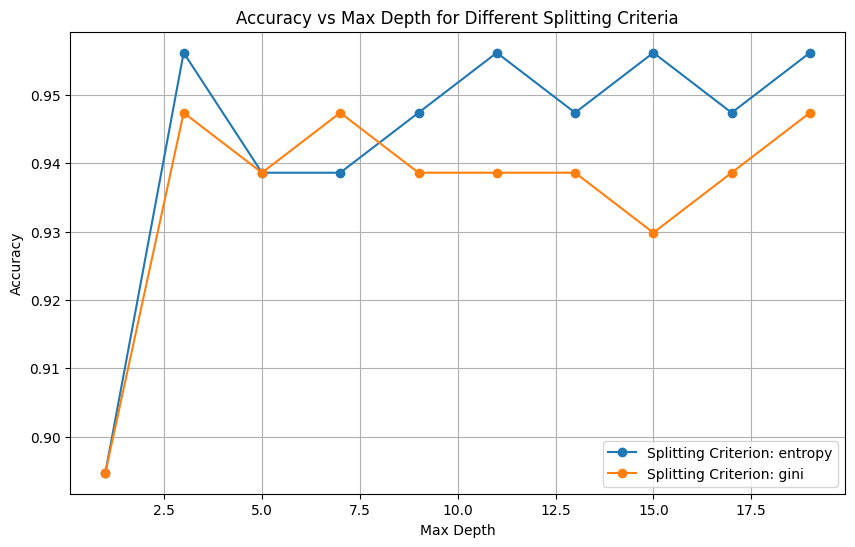

In [5]:
# Visualize the accuracy vs max depth for each splitting criterion
plt.figure(figsize=(10, 6))
for criterion in splitting_criteria:
    accuracies = [result['accuracy'] for (c, md), result in results.items() if c == criterion]
    plt.plot(max_depth_values, accuracies, marker='o', label=f'Splitting Criterion: {criterion}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Splitting Criteria')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion
This tutorial covers the Decision Tree algorithm using the Breast Cancer dataset. It demonstrates how different splitting criteria (Information Gain and Gini Index) and tree pruning (max depth) affect the classification results. The tutorial prints the accuracy of the models with different hyperparameters and visualizes the accuracy vs max depth for each splitting criterion for comparison.

Feel free to adjust the max_depth_values and add other hyperparameters to explore their effects on the decision tree's performance.